[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nagaoka-ai-innovationhub/basics-of-image-recognition-with-cnn/blob/master/07_how_to_avoid_overfitting.ipynb)

# 過学習対策

機械学習をおこなっていく上で、訓練用データにはうまく適合しているのですが、テスト用データにはうまく適合できないケースは多々出てきます。
例えば以下のMNISTの例では、訓練用データでは約98%の正答率ですが、テスト用データはそれより正答率が落ちてしまいます。

In [2]:
# ColabでのTensorFlow 2.xのインストール
try:
    # %tensorflow_version は Colab 上でのみ使えます
    %tensorflow_version 2.x
except Exception:
    pass

# ライブラリの読み込み
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# TensorFlowとtf.kerasのバージョン確認
print(tf.version.VERSION)
print(tf.keras.__version__)

2.0.0-beta1
2.2.4-tf


In [3]:
# MNISTデータセットの読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# モデルの構築
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# 学習データの前処理
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# モデルの学習
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

# 学習済モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)

W0821 15:37:54.526314 4523267520 deprecation.py:323] From /Users/administrator/Sources/markdown/Seminar/nagaoka_ai_innovation_hub/20190829primary_image_recognition_bitbucket/env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2545 - accuracy: 0.9266
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1060 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0695 - accuracy: 0.9787
Epoch 4/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0504 - accuracy: 0.9850
Epoch 5/5
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0669 - accuracy: 0.9803
test_acc:  0.9803


これは、訓練用データに適合しすぎて、未知のデータであるテスト用データを使って推論するとそれよりも落ちてしまう現象です。
このことを「**過学習**」(overfitting)と呼びます。

過学習とは異なり、訓練用データにまだ適合できていないことを「学習不足」(underfitting)と呼びます。これはまだモデルに改善の余地があることを示しています。

ここで、訓練用データの最初の10,000件を検証用データとして学習し、学習の過程をグラフ化してみましょう。

In [4]:
# MNISTデータセットの読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# モデルの構築
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# 学習データの前処理
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# データを訓練用と検証用に分ける
x_val = train_images[:10000]      # 検証用
x_train = train_images[10000:]   # 訓練用

y_val = train_labels[:10000]     # 検証用
y_train = train_labels[10000:]  # 訓練用

In [6]:
# モデルの学習
history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 65us/sample - loss: 0.2792 - accuracy: 0.9199 - val_loss: 0.1575 - val_accuracy: 0.9528
Epoch 2/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.1172 - accuracy: 0.9652 - val_loss: 0.1155 - val_accuracy: 0.9675
Epoch 3/20
50000/50000 [==============================] - 3s 56us/sample - loss: 0.0756 - accuracy: 0.9777 - val_loss: 0.0923 - val_accuracy: 0.9718
Epoch 4/20
50000/50000 [==============================] - 3s 56us/sample - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0768 - val_accuracy: 0.9780
Epoch 5/20
50000/50000 [==============================] - 3s 60us/sample - loss: 0.0403 - accuracy: 0.9882 - val_loss: 0.0830 - val_accuracy: 0.9761
Epoch 6/20
50000/50000 [==============================] - 3s 60us/sample - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0725 - val_accuracy: 0.9792
Epoch 7/20
50000/50000 [==============================] 

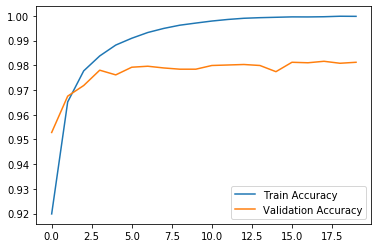

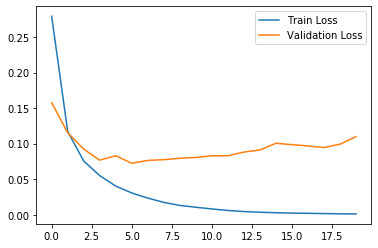

In [7]:
# 学習の推移をグラフ化してみてみよう。
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']  # 学習データの正答率
val_acc = history.history['val_accuracy']  # 検証データの正答率
loss = history.history['loss']  # 学習データの損失
val_loss = history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

学習を繰り返す毎に、訓練用データには非常によく適合しています。
対して、検証用データには、途中で損失も正答率も改善が見られません。
この例では8エポック以降から損失が増加している傾向が見られます。

機械学習での本来の目的は、訓練用データの適合ではなく、未知のデータ（この場合検証用データ）に対して、うまく予測できることです。
未知のデータにうまく予測できるように、学習モデルをうまく汎化させることが必要になります。

例えば、今回の例では7エポック時点で訓練を止めるというのも、過学習対策の一つの方法です。

最も最善の策は「**学習データを増やす**」ことです。データを学習すればするほど、モデルは自然と汎化していきます。
それができない場合は、いくつか方法があります。

## 1. モデルサイズを小さくする

単純な方法としては、モデルのサイズを小さくすることです。
これはモデルの学習可能なパラメータを減らすことになります。
パラメータは「層の数」と「層1つあたりのユニット（ノード）の数」によって決まります。

パラメータが多いほど、モデルが持つ記憶容量(キャパシティ）が増えて、
訓練用の入力データとそれに対する目的の値とのマッピングをまるで辞書を引くかのように学習できることが直感的にわかるかと思います。
しかし、マッピングの性能は汎化の性能とは関係ありません。

一方で、モデルサイズが小さいと、このマッピングは簡単に学習することはできません。
モデルが持つ記憶容量が少なくなりますので、学習不足に陥る可能性も出てきます。

そのため、「キャパシティが多すぎる」状態と「キャパシティが足りない」状態の妥協点を探る必要がありますが、
適切なキャパシティを簡単に求められる方法がないため、様々な方法を試みてみなければなりません。

一般的なワークフローは、比較的少ない数の層とユニット（ノード）から始めて、検証データでの損失値を見て収穫逓減が見られるまで、層を追加したり層のユニット数を増やしたりしていきます。

ここでは、キャパシティの大小で学習の推移がどれだけ変わるのかを比較してみてみましょう。

In [8]:
# 比較のベースとなるモデルの構築
base_model = models.Sequential()
base_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
base_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
base_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [9]:
# キャパシティの小さいモデルの構築
low_model = models.Sequential()
low_model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
low_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
low_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [10]:
# キャパシティの大きいモデルの構築
high_model = models.Sequential()
high_model.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
high_model.add(layers.Dense(1024, activation='relu', input_shape=(28 * 28,)))
high_model.add(layers.Dense(10, activation='softmax'))

# モデルのコンパイル
high_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

In [11]:
# モデルの学習
base_history = base_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 73us/sample - loss: 0.2778 - accuracy: 0.9187 - val_loss: 0.1405 - val_accuracy: 0.9581
Epoch 2/20
50000/50000 [==============================] - 3s 56us/sample - loss: 0.1129 - accuracy: 0.9661 - val_loss: 0.1024 - val_accuracy: 0.9692
Epoch 3/20
50000/50000 [==============================] - 3s 65us/sample - loss: 0.0750 - accuracy: 0.9779 - val_loss: 0.0881 - val_accuracy: 0.9737
Epoch 4/20
50000/50000 [==============================] - 3s 58us/sample - loss: 0.0535 - accuracy: 0.9842 - val_loss: 0.0791 - val_accuracy: 0.9751
Epoch 5/20
50000/50000 [==============================] - 3s 59us/sample - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.0855 - val_accuracy: 0.9744
Epoch 6/20
50000/50000 [==============================] - 3s 61us/sample - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0718 - val_accuracy: 0.9784
Epoch 7/20
50000/50000 [==============================] 

In [12]:
# キャパシティの小さいモデルの学習
low_history = low_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.4151 - accuracy: 0.8904 - val_loss: 0.2401 - val_accuracy: 0.9339
Epoch 2/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.2090 - accuracy: 0.9411 - val_loss: 0.1905 - val_accuracy: 0.9458
Epoch 3/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.1583 - accuracy: 0.9545 - val_loss: 0.1504 - val_accuracy: 0.9589
Epoch 4/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.1290 - accuracy: 0.9635 - val_loss: 0.1360 - val_accuracy: 0.9614
Epoch 5/20
50000/50000 [==============================] - 1s 20us/sample - loss: 0.1091 - accuracy: 0.9693 - val_loss: 0.1223 - val_accuracy: 0.9647
Epoch 6/20
50000/50000 [==============================] - 1s 25us/sample - loss: 0.0942 - accuracy: 0.9725 - val_loss: 0.1137 - val_accuracy: 0.9669
Epoch 7/20
50000/50000 [==============================] 

In [13]:
# キャパシティの大きいモデルの学習
high_history = high_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 295us/sample - loss: 0.2327 - accuracy: 0.9280 - val_loss: 0.1294 - val_accuracy: 0.9602
Epoch 2/20
50000/50000 [==============================] - 14s 285us/sample - loss: 0.0843 - accuracy: 0.9742 - val_loss: 0.0856 - val_accuracy: 0.9751
Epoch 3/20
50000/50000 [==============================] - 14s 284us/sample - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.1153 - val_accuracy: 0.9699
Epoch 4/20
50000/50000 [==============================] - 14s 282us/sample - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0912 - val_accuracy: 0.9785
Epoch 5/20
50000/50000 [==============================] - 16s 329us/sample - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.0935 - val_accuracy: 0.9791
Epoch 6/20
50000/50000 [==============================] - 15s 292us/sample - loss: 0.0265 - accuracy: 0.9924 - val_loss: 0.0970 - val_accuracy: 0.9808
Epoch 7/20
50000/50000 [====================

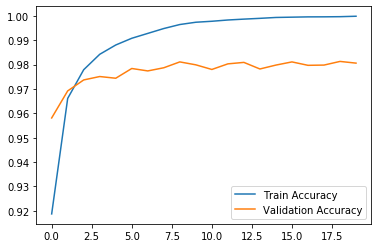

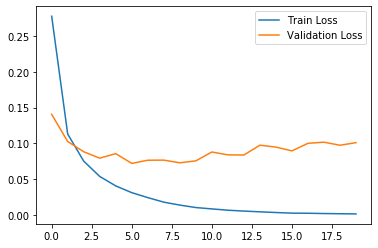

In [14]:
# ベースモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = base_history.history['accuracy']  # 学習データの正答率
val_acc = base_history.history['val_accuracy']  # 検証データの正答率
loss = base_history.history['loss']  # 学習データの損失
val_loss = base_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

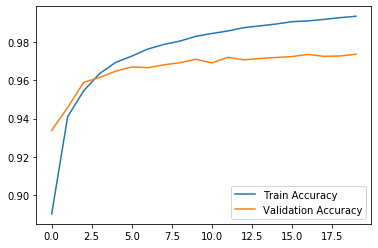

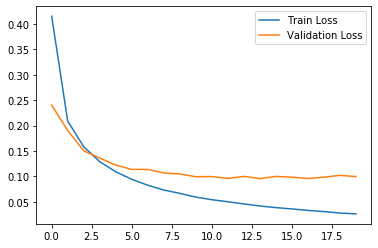

In [15]:
# キャパシティの小さいモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = low_history.history['accuracy']  # 学習データの正答率
val_acc = low_history.history['val_accuracy']  # 検証データの正答率
loss = low_history.history['loss']  # 学習データの損失
val_loss = low_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

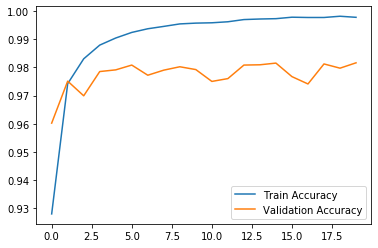

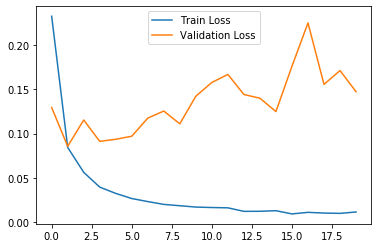

In [16]:
# キャパシティの大きいモデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = high_history.history['accuracy']  # 学習データの正答率
val_acc = high_history.history['val_accuracy']  # 検証データの正答率
loss = high_history.history['loss']  # 学習データの損失
val_loss = high_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

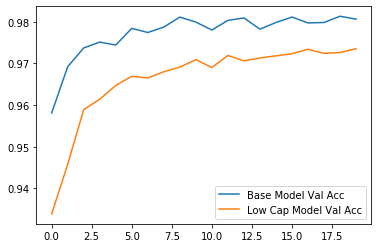

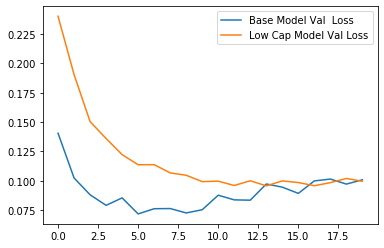

In [17]:
# ベースモデルと小さいモデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
low_val_acc = low_history.history['val_accuracy']  # 検証データの正答率
low_val_loss = low_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, low_val_acc, label='Low Cap Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, low_val_loss, label='Low Cap Model Val Loss')
plt.legend()
plt.show()

ベースモデルとキャバシティの小さいモデルの学習推移を比較ましょう。
ベースモデルでは、損失が7エポックくらいから徐々に大きくなっています。
一方、キャパシティの小さいモデルでは、全体的に損失が大きいですが、15エポックくらいから損失がベースモデルより小さくなっています。

基本的に、キャパシティの小さいモデルは性能低下が遅くなる傾向があります。
今回のキャパシティの小さいモデルは、まだ学習の余地がありそうです。

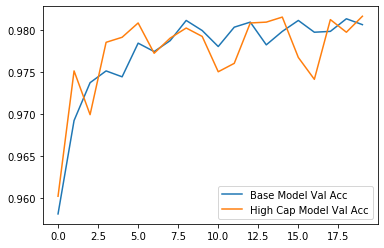

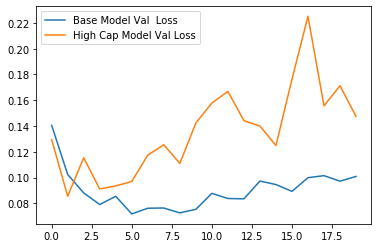

In [18]:
# ベースモデルと大きいモデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
high_val_acc = high_history.history['val_accuracy']  # 検証データの正答率
high_val_loss = high_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, high_val_acc, label='High Cap Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, high_val_loss, label='High Cap Model Val Loss')
plt.legend()
plt.show()

ベースモデルとキャバシティの大きいモデルの学習推移を比較ましょう。
ベースモデルでは、損失が7エポックくらいから徐々に大きくなっています。
一方、キャパシティの大きいモデルでは、3エポック以降から損失がベースモデルより大きくなっています。 
また、損失の振れ幅が大きくノイズがある状態です。

基本的に、キャパシティの大きいモデルはすぐにモデル化されますが、過学習に陥りやすくなります。
今回のキャパシティの大きいモデルは、ベースモデルよりも深刻な過学習になっていることがわかります。

もう一度改めて述べますが、一般的なワークフローは、比較的少ない数の層とユニット（ノード）から始めて、検証データでの損失値を見て収穫逓減が見られるまで、層を追加したり層のユニット数を増やしたりしていきます。問題を解くのに適切なサイズはどれなのか、繰り返し学習をしてキャパシティサイズを決めていきましょう。

## 2. 重みを正則化する

正則化 (regularization) は、モデルの複雑さに歯止めをかけて過学習を防ぐための手法です。
正則化は、[オッカムの剃刀](https://ja.wikipedia.org/wiki/%E3%82%AA%E3%83%83%E3%82%AB%E3%83%A0%E3%81%AE%E5%89%83%E5%88%80) (Occam's razor) という原則で言われている「必要以上に多くを仮定すべきではない」を実現するものです。
単純なモデルの方が、より複雑なモデルよりも過学習に陥りにくい可能性があります。

単純なモデルとは、パラメータの数が少ないモデルのことを意味します。
ここでは、モデルのネットワークの重みに小さい値だけが設定されるようにすることで、ネットワークの複雑さに歯止めをかけることができます。
重みの値をそのように制限すると、重みの値の分布がより正則化されます。

重みを正則化するには、大きな重みを使用する場合の**コスト**を追加します。
コストには2種類存在します。

- L1正則化
    - 追加されるコストは重みの絶対値 (重みのL1ノルム) に比例
    - 大きな値となるような重みを削減する際に使われる
- L2正則化
    -　追加されるコストは重みの値の二乗 (重みのL2ノルム) に比例
    - 大きな値となるような重みを小さくして、大きな値にならないようにする

`tf.keras`では、以下のように指定できます。

In [19]:
# モデルにL2正則化を追加
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
l2_model.add(layers.Dense(10, activation='softmax'))

`l2(0.001)`は、その層の重みごとに、ネットワークの全損失に `0.001* weight_coefficient_value` を足すことを意味します。
(`weight_coefficient_value`: 重み係数値)

ベースモデルと比較してみましょう。

In [20]:
# モデルのコンパイル
l2_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# モデルの学習
l2_history = l2_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 88us/sample - loss: 0.5219 - accuracy: 0.9140 - val_loss: 0.3376 - val_accuracy: 0.9424
Epoch 2/20
50000/50000 [==============================] - 3s 61us/sample - loss: 0.2624 - accuracy: 0.9543 - val_loss: 0.2324 - val_accuracy: 0.9583
Epoch 3/20
50000/50000 [==============================] - 3s 62us/sample - loss: 0.2078 - accuracy: 0.9642 - val_loss: 0.2007 - val_accuracy: 0.9641
Epoch 4/20
50000/50000 [==============================] - 3s 61us/sample - loss: 0.1839 - accuracy: 0.9680 - val_loss: 0.1843 - val_accuracy: 0.9675
Epoch 5/20
50000/50000 [==============================] - 3s 67us/sample - loss: 0.1705 - accuracy: 0.9704 - val_loss: 0.1784 - val_accuracy: 0.9685
Epoch 6/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.1618 - accuracy: 0.9722 - val_loss: 0.1746 - val_accuracy: 0.9691
Epoch 7/20
50000/50000 [==============================] 

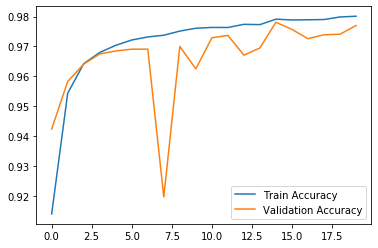

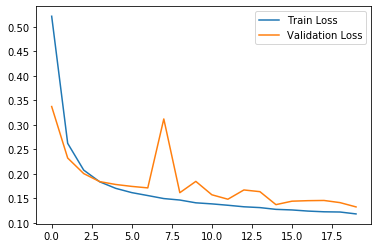

In [21]:
# L2正則化モデルの学習の推移をグラフ化
import matplotlib.pyplot as plt
%matplotlib inline

acc = l2_history.history['accuracy']  # 学習データの正答率
val_acc = l2_history.history['val_accuracy']  # 検証データの正答率
loss = l2_history.history['loss']  # 学習データの損失
val_loss = l2_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, acc, label='Train Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

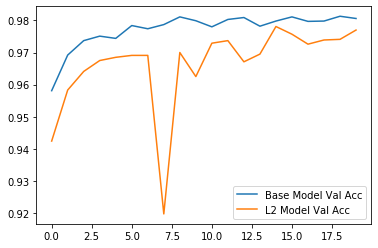

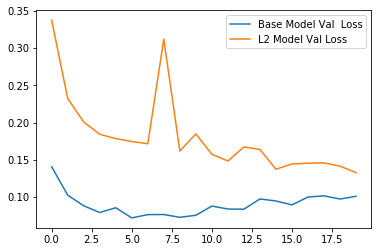

In [22]:
# ベースモデルとL2正則化モデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
l2_val_acc = l2_history.history['val_accuracy']  # 検証データの正答率
l2_val_loss = l2_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, l2_val_acc, label='L2 Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, l2_val_loss, label='L2 Model Val Loss')
plt.legend()
plt.show()

今回のL2正則化モデルは学習の推移を見る限り、エポック数をさらに増やすと損失が減って良いモデルに近づくかもしれません。
また、過学習が抑えられていることがわかると思います。

正則化は以下の方法で指定することができます。

In [23]:
from tensorflow.keras import regularizers

# L1正則化
regularizers.l1(0.001)

# L2正則化
regularizers.l2(0.001)

# L1正則化とL2正則化の同時適用
regularizers.l1_l2(l1=0.001, l2=0.001)

## 3. Dropout を追加する

ドロップアウト (Dropout) はニューラルネットワークでよく用いられる正則化手法の一つです。
ドロップアウトは、訓練中の層の出力の一部をランダムに取り除きます。すなわち、出力の一部をランダムに0にします。

例えば、`[0.2, 0.5, 0.1, 1.1, 0.4]` のようなベクトルがある場合、ドロップアウトを実施すると `[0, 0.5, 0.1, 0, 0.4]`のように一部をランダムに0にします。
ランダムに0にする割合を**ドロップアウト率**と呼ばれ、通常は0.2から0.5に設定します。

`tf.keras`では、`Dropout`層を追加することで適用できます。

In [24]:
# モデルにドロップアウトを追加
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dropout_model.add(layers.Dropout(0.5))
dropout_model.add(layers.Dense(10, activation='softmax'))

In [25]:
# モデルのコンパイル
dropout_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# モデルの学習
dropout_history = dropout_model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 4s 84us/sample - loss: 0.3371 - accuracy: 0.9005 - val_loss: 0.1717 - val_accuracy: 0.9501
Epoch 2/20
50000/50000 [==============================] - 4s 76us/sample - loss: 0.1639 - accuracy: 0.9513 - val_loss: 0.1211 - val_accuracy: 0.9646
Epoch 3/20
50000/50000 [==============================] - 4s 74us/sample - loss: 0.1287 - accuracy: 0.9605 - val_loss: 0.1058 - val_accuracy: 0.9680
Epoch 4/20
50000/50000 [==============================] - 3s 69us/sample - loss: 0.1061 - accuracy: 0.9688 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 5/20
50000/50000 [==============================] - 4s 81us/sample - loss: 0.0918 - accuracy: 0.9719 - val_loss: 0.0858 - val_accuracy: 0.9749
Epoch 6/20
50000/50000 [==============================] - 3s 64us/sample - loss: 0.0809 - accuracy: 0.9751 - val_loss: 0.0775 - val_accuracy: 0.9785
Epoch 7/20
50000/50000 [==============================] 

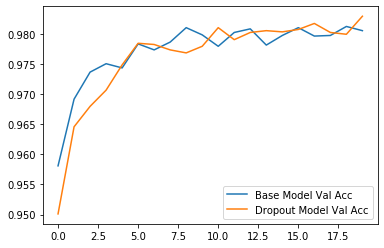

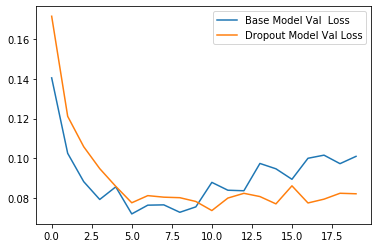

In [26]:
# ベースモデルとDropout追加モデルの検証データでの学習推移を比較
import matplotlib.pyplot as plt
%matplotlib inline

base_val_acc = base_history.history['val_accuracy']  # 検証データの正答率
base_val_loss = base_history.history['val_loss']  # 検証データの損失
dropout_val_acc = dropout_history.history['val_accuracy']  # 検証データの正答率
dropout_val_loss = dropout_history.history['val_loss']  # 検証データの損失

epochs = range(len(acc))

plt.plot(epochs, base_val_acc, label='Base Model Val Acc')
plt.plot(epochs, dropout_val_acc, label='Dropout Model Val Acc')
plt.legend()
plt.show()

plt.plot(epochs, base_val_loss, label='Base Model Val  Loss')
plt.plot(epochs, dropout_val_loss, label='Dropout Model Val Loss')
plt.legend()
plt.show()

ドロップアウトを追加すると、ベースモデルより損失の増加が抑えられており、過学習に効果があることが伺えます。

## 過学習対策のまとめ

過学習の対策は以下の通りです。

- 学習データを増やす
- モデルサイズを小さくする
- 重みを正則化する
- Dropoutを追加する

なお、学習データを増やせない場合、代替案としてデータ拡張を使う方法があります。
データ拡張については、[05_input_and_display_images.ipynb](./05_input_and_display_images.ipynb) をご確認ください。
ただし、元の学習データ数があまりにも少ないとデータ拡張の効果があまり出ませんので、過信は禁物です。